In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Password",
  database='database1'
)
print(mydb)

In [4]:
# Loading the dataset from MySQL which is from table named wine
df=pd.read_sql_query("select * from wine",mydb)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Checking for shape (ie.,number of rows and columns.)
print(df.shape)

(178, 14)


###### Observations: There are 178 rows and 14 columns in the dataset

# Exploratory Data Analysis

### Variable Identification

###### ==> Class is the target variable

In [6]:
# checking the datatypes of the dataset.
print(df.dtypes)

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object


###### Observations: All the features are of numeric type

In [7]:
#Checking the columns of dataset
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [8]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
#Checking the null values if any
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

###### Observations: There are no missing values in the dataset

In [10]:
# Checking for count of unique values in each feature
for s in  df.columns:
    print(s,df[s].nunique())

Class 3
Alcohol 126
Malic acid 133
Ash 79
Alcalinity of ash 63
Magnesium 53
Total phenols 97
Flavanoids 132
Nonflavanoid phenols 39
Proanthocyanins 101
Color intensity 132
Hue 78
diluted wines 122
Proline     121


# Summary Statistics

In [11]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# To check the Correlation

In [12]:
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


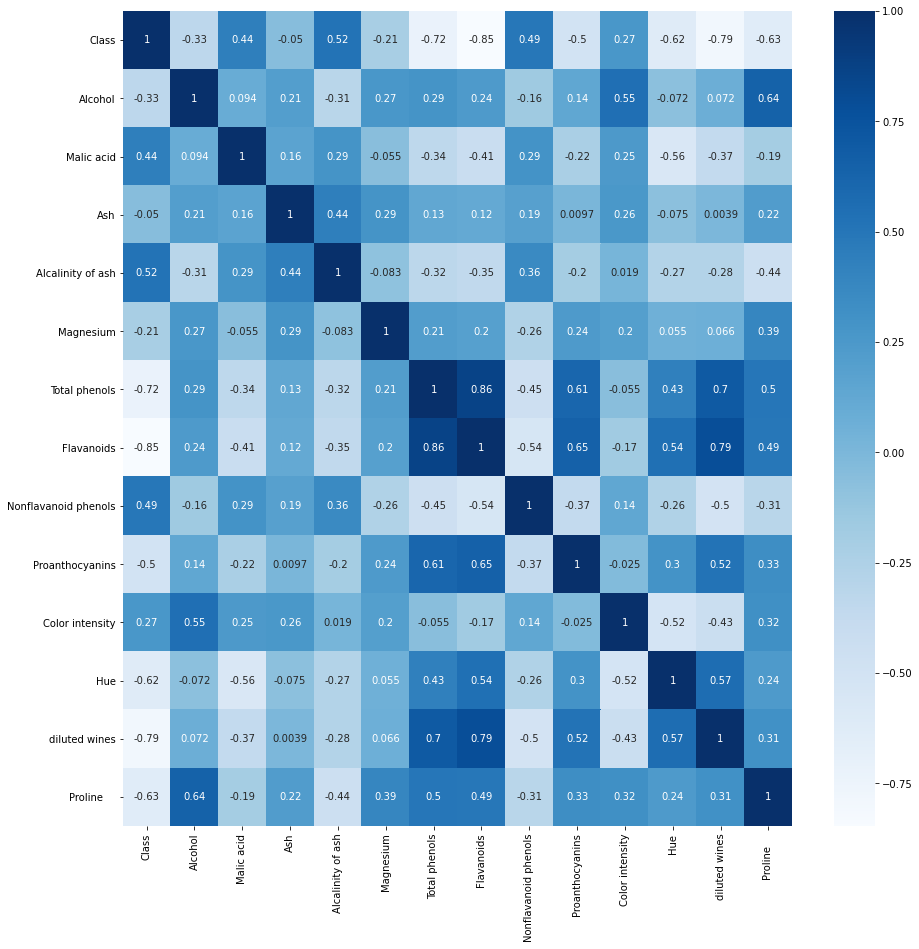

In [13]:
#visualizing correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,cmap='Blues');

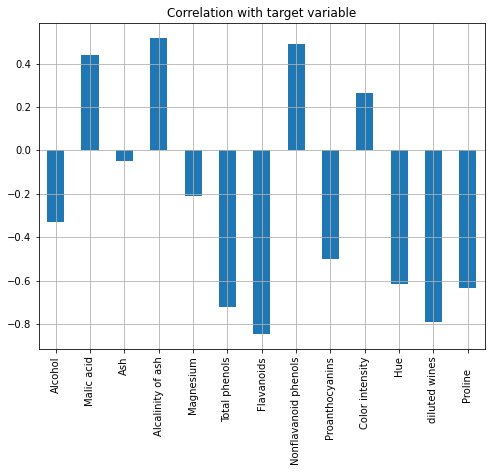

In [14]:
plt.figure(figsize=(8,6))
df.drop('Class',axis = 1).corrwith(df['Class']).plot(kind='bar',grid=True)
plt.xticks(rotation = 90)
plt.title('Correlation with target variable');

###### Observations: "Alcalinity of ash" is highly correlated and "Flavanoids" is negatively correlatedwith target variable(Class)

# Univariate Analysis

<Figure size 360x360 with 0 Axes>

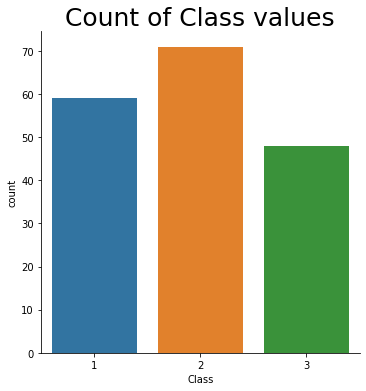



Class :
2    71
1    59
3    48
Name: Class, dtype: int64


In [15]:
# checking the Class count
plt.figure(figsize=[5,5])
sns.factorplot('Class',data=df,kind='count')
plt.title('Count of Class values',fontsize = 25)
plt.xlabel('Class')
plt.ylabel('count')
plt.show()

print('\n')
print('Class :')
print(df['Class'].value_counts());

In [16]:
print('Ratio of class 1 = ', round(len(df[df['Class']==1]) / len(df.Class),2)*100,'%')
print('Ratio of class 2 = ', round(len(df[df['Class']==2]) / len(df.Class),2)*100,'%')
print('Ratio of class 3 = ', round(len(df[df['Class']==3]) / len(df.Class),2)*100,'%')

Ratio of class 1 =  33.0 %
Ratio of class 2 =  40.0 %
Ratio of class 3 =  27.0 %


# Bivariate Analysis

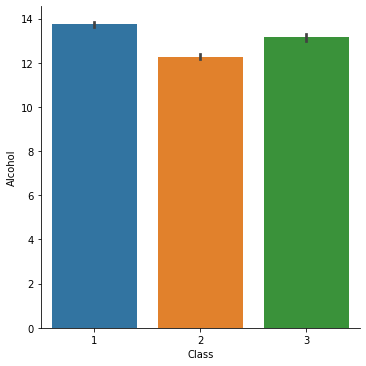

In [17]:
sns.factorplot(x='Class',y='Alcohol',kind='bar',data=df)

<AxesSubplot:xlabel='Class', ylabel='Hue'>

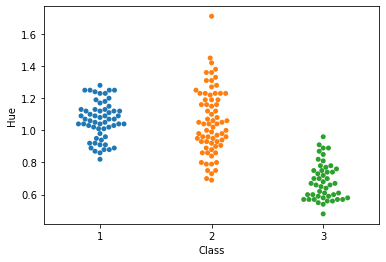

In [18]:
sns.swarmplot(x='Class',y='Hue',data=df)

<Figure size 864x576 with 0 Axes>

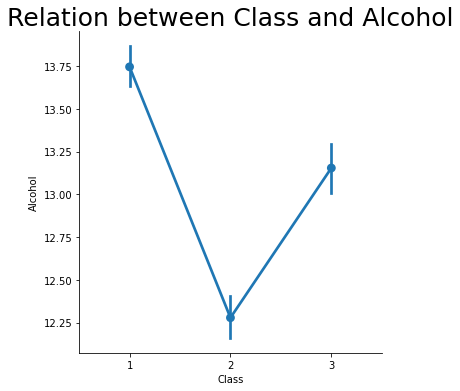

<Figure size 864x576 with 0 Axes>

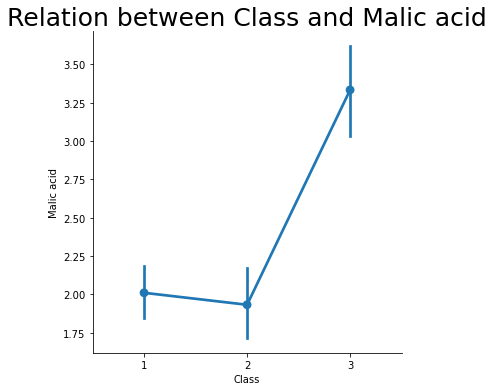

<Figure size 864x576 with 0 Axes>

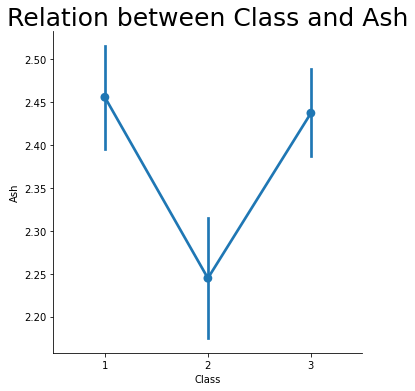

<Figure size 864x576 with 0 Axes>

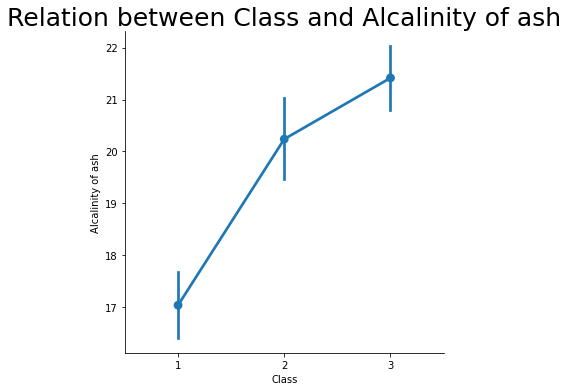

<Figure size 864x576 with 0 Axes>

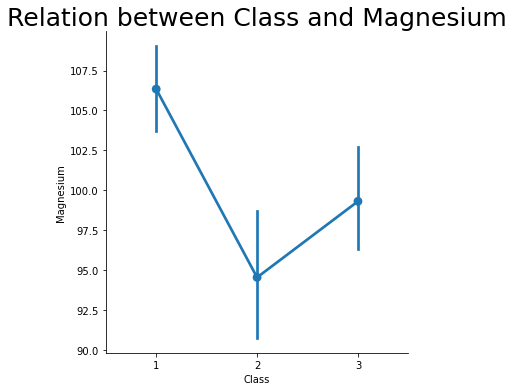

<Figure size 864x576 with 0 Axes>

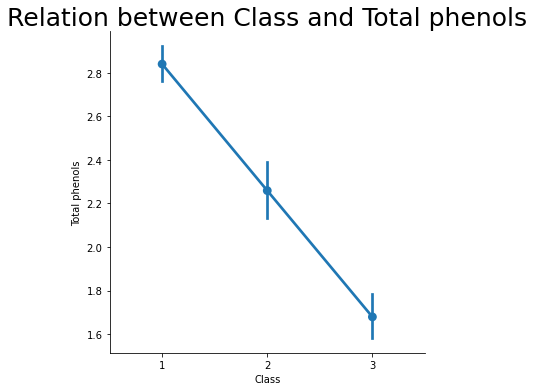

<Figure size 864x576 with 0 Axes>

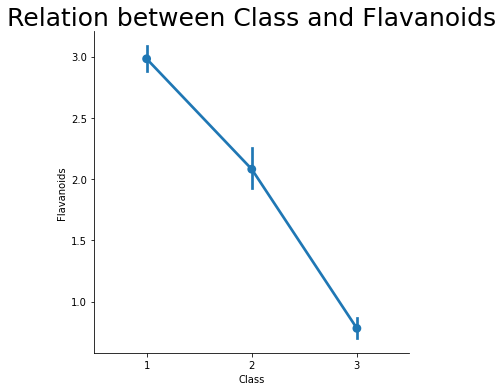

<Figure size 864x576 with 0 Axes>

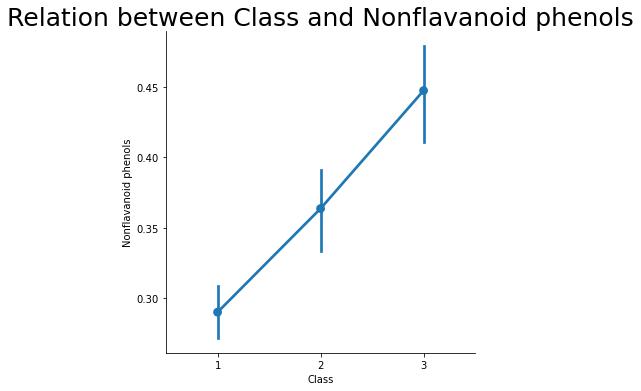

<Figure size 864x576 with 0 Axes>

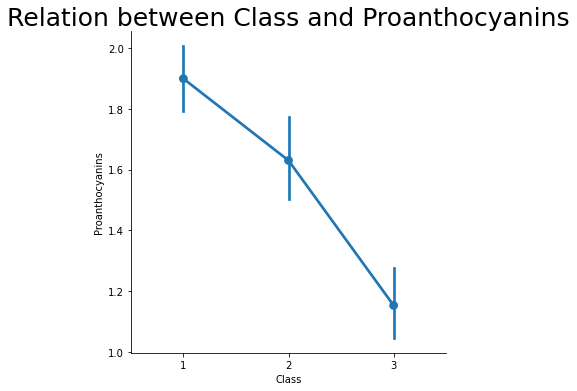

<Figure size 864x576 with 0 Axes>

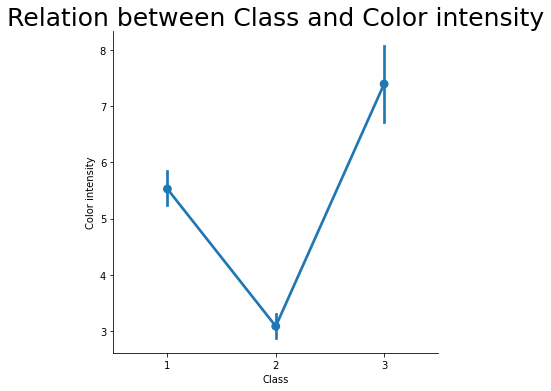

<Figure size 864x576 with 0 Axes>

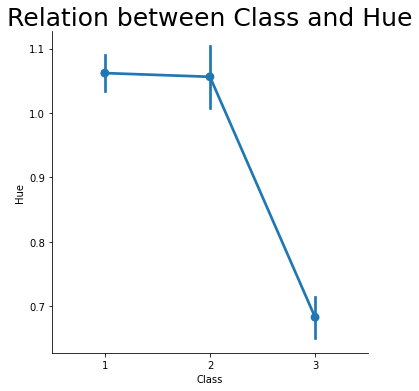

<Figure size 864x576 with 0 Axes>

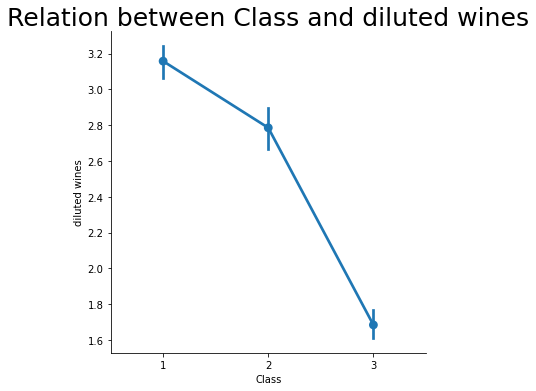

<Figure size 864x576 with 0 Axes>

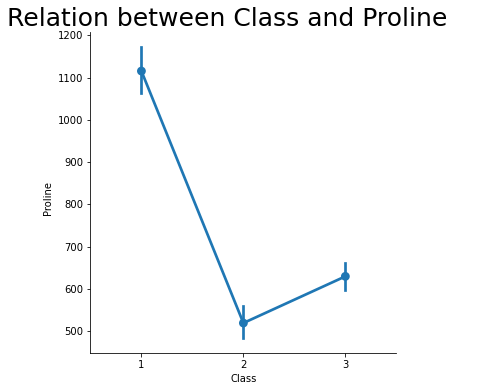

In [19]:
for i in df.columns[1:]:
    plt.figure(figsize=(12,8))
    sns.catplot('Class',i, kind='point', data=df)
    plt.title('Relation between Class and {}'.format(i),fontsize =25)    

###### Observations : 
###### Class 1 contains more Alcohol than Class 2 & 3.
###### Class 3 contains more Malic acid and Class 1 & 2 has almost same.
###### Class 2 has less ash content.
###### Alcalinity of ash,Nonflavanoid phenols increases with the Class like 1 followed by 2 then followed by 3.
###### Class 1 contains more Magnesium and Proline content.
###### Total phenols,Flavanoids,Proanthocyanins,diluted wines decreases with the Class like 1 followed by 2 then followed by 3.
###### Class 3 contains more Color intensity,
###### Hue is approximately equal for Class 1,2 and is more

# Multivariate Analysis

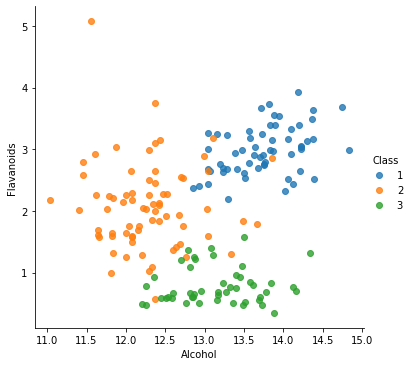

In [20]:
sns.lmplot(x='Alcohol', y='Flavanoids', hue='Class', 
           data=df.loc[df['Class'].isin(['1', '2', '3'])], 
           fit_reg=False)

<Figure size 1440x864 with 0 Axes>

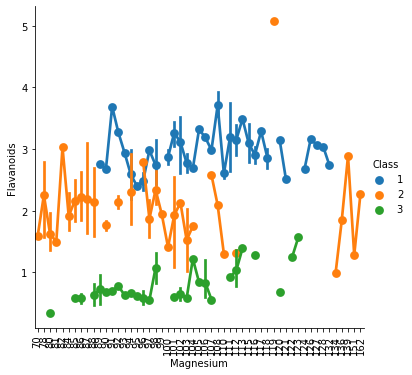

In [21]:
plt.figure(figsize=(20,12))
sns.catplot('Magnesium','Flavanoids',hue='Class', kind='point', data=df)
plt.xticks(rotation=90);

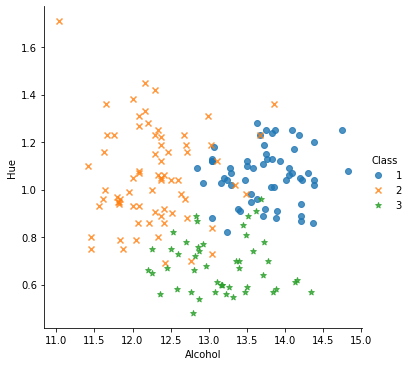

In [22]:
sns.lmplot(x='Alcohol', y='Hue', markers=['o', 'x', '*'], hue='Class',
           data=df.loc[df['Class'].isin(['1', '2', '3'])], 
           fit_reg=False)

Observations:

==> Alcohol of Class 2 is in the range of 13.0 with Hue of 0.8 to 1.4, Class 3 is 12.5 to 14  with lower Hue and Class 1 is in 

the range of 13.0 to 15.0 with Hue of 0.9 to 1.3

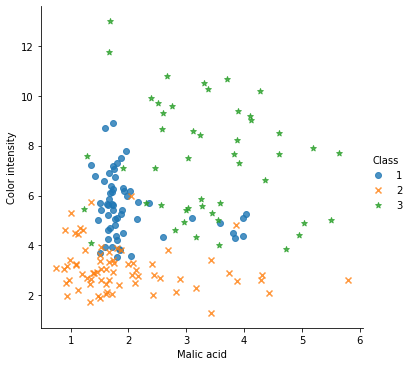

In [23]:
sns.lmplot(x='Malic acid', y='Color intensity', markers=['o', 'x', '*'], hue='Class',
           data=df.loc[df['Class'].isin(['1', '2', '3'])], 
           fit_reg=False)

Observations:
    
==> Class 2 has low content of Malic acid content with respect to Color intensity

# Missing values treatment

In [24]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

###### Observations: There are no missing values in the dataset.

# Outlier treatment

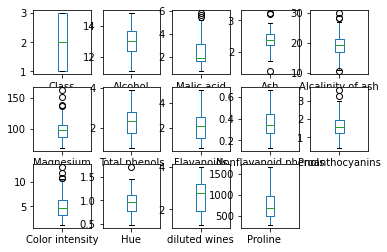

In [25]:
df.plot(kind='box',subplots=True,layout=(3,5))
plt.show()

In [26]:
#Seperating into input and output variables
x = df.drop(['Class'], axis=1)
y = df['Class']

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(x))

In [28]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 2,  2,  4,  3,  4,  8, 10,  2,  6,  1,  9], dtype=int64))


In [29]:
z[25][2]

3.1197718608780005

In [30]:
df_outlier=x[(z<3).all(axis=1)]

In [32]:
print(df.shape,'\t',df_outlier.shape)

(178, 14) 	 (168, 13)


###### Observations: 178 rows has been reduced to 168. Therefore,10 outliers are removed.

In [33]:
df = df_outlier

# Treating the Skewness

Alcohol
-0.02778671851535369


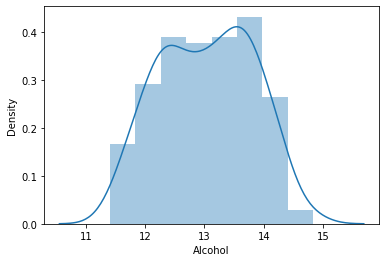

Malic acid
0.9576042724869932


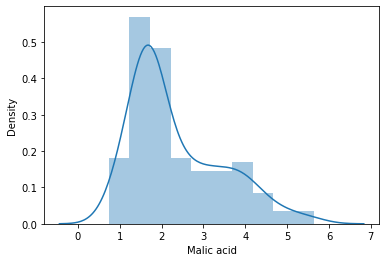

Ash
-0.24819606418746792


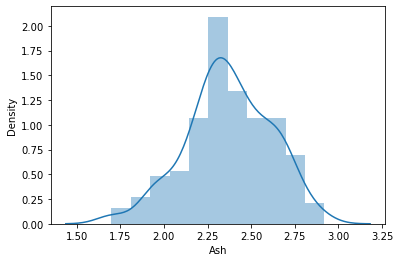

Alcalinity of ash
0.10383637288751292


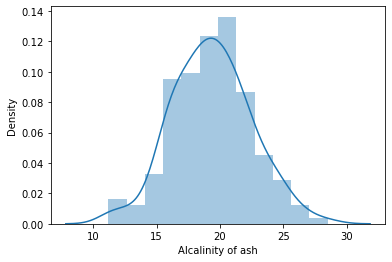

Magnesium
0.5614507391742265


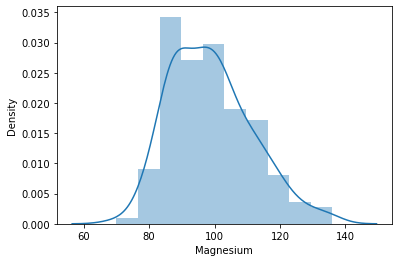

Total phenols
0.13092575283208224


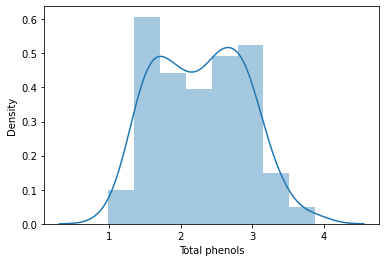

Flavanoids
-0.07651404305836026


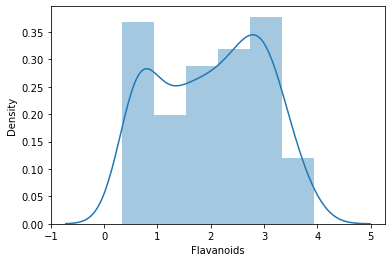

Nonflavanoid phenols
0.47749713688150763


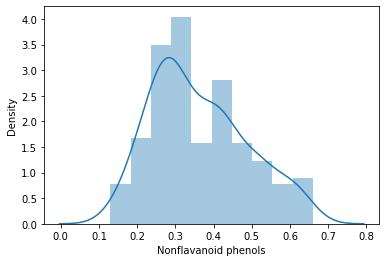

Proanthocyanins
0.35699283714348623


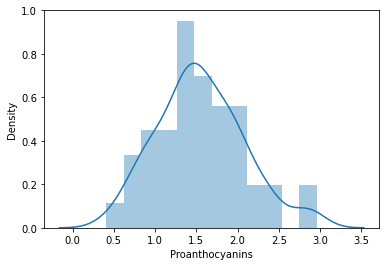

Color intensity
0.7260224855790369


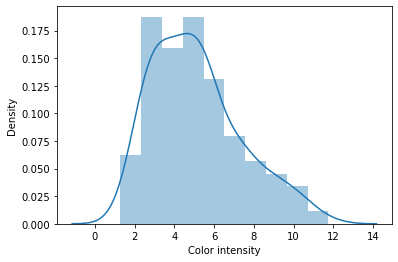

Hue
-0.13619979691572573


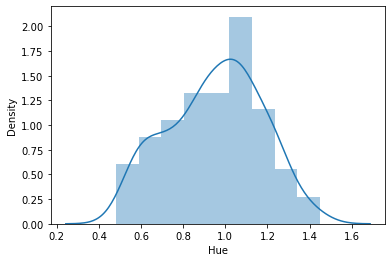

diluted wines
-0.2799854220275503


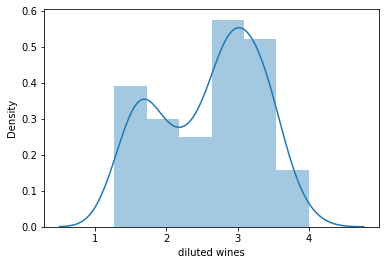

Proline    
0.7381071089988761


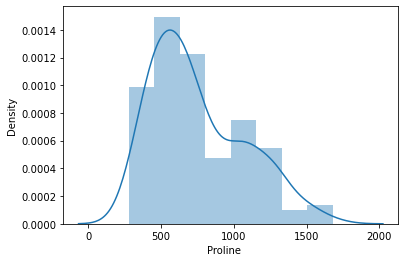

In [34]:
#Let's visualize the skewness with the distplots.
from scipy.stats import skew

for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [35]:
df.skew()

Alcohol                -0.028038
Malic acid              0.966253
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.744773
dtype: float64

In [36]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)

In [37]:
# Right Skewed
Q3-Q2 > Q2-Q1 

Alcohol                 False
Malic acid               True
Ash                      True
Alcalinity of ash        True
Magnesium               False
Total phenols           False
Flavanoids              False
Nonflavanoid phenols     True
Proanthocyanins          True
Color intensity         False
Hue                     False
diluted wines           False
Proline                  True
dtype: bool

In [38]:
Right = ['Malic acid','Ash','Alcalinity of ash','Nonflavanoid phenols','Proanthocyanins','Proline    ']
for col in Right:
    df[Right] = np.sqrt(df[Right])

In [39]:
df.skew()

Alcohol                -0.028038
Malic acid              0.244878
Ash                    -0.563108
Alcalinity of ash      -0.435093
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols   -0.170509
Proanthocyanins        -0.698824
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.082003
dtype: float64

In [40]:
# Left Skewed
Q3-Q2 < Q2-Q1 

Alcohol                  True
Malic acid              False
Ash                     False
Alcalinity of ash       False
Magnesium                True
Total phenols            True
Flavanoids               True
Nonflavanoid phenols    False
Proanthocyanins         False
Color intensity          True
Hue                      True
diluted wines            True
Proline                 False
dtype: bool

In [41]:
Left = ['Alcohol','Magnesium', 'Total phenols', 'Color intensity','Flavanoids','Hue', 'diluted wines']
for col in Left:
    df[Left] = np.cbrt(df[Left])

# Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1))  
# Scaled feature
x = min_max_scaler.fit_transform(x) 
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [47]:
# EDA(Exploratory data analysis) project ends here